### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [17]:
import pandas as pd

# Configurar pandas para mostrar números sin notación científica
pd.options.display.float_format = '{:,.2f}'.format

# URLs de las bases de datos
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datos
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Asegurarse de que la columna 'Precio' sea numérica
tienda['Precio'] = pd.to_numeric(tienda['Precio'], errors='coerce')
tienda2['Precio'] = pd.to_numeric(tienda2['Precio'], errors='coerce')
tienda3['Precio'] = pd.to_numeric(tienda3['Precio'], errors='coerce')
tienda4['Precio'] = pd.to_numeric(tienda4['Precio'], errors='coerce')

# Calcular los ingresos de cada tienda
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Calcular el ingreso total
ingreso_total = ingreso_tienda1 + ingreso_tienda2 + ingreso_tienda3 + ingreso_tienda4

# Crear un DataFrame para mostrar los resultados en formato tabla
ingresos = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4', 'Total'],
    'Ingreso Total': [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4, ingreso_total]
})

# Mostrar la tabla
ingresos

,Tienda,Ingreso Total
0,Tienda 1,"1,150,880,400.00"
1,Tienda 2,"1,116,343,500.00"
2,Tienda 3,"1,098,019,600.00"
3,Tienda 4,"1,038,375,700.00"
4,Total,"4,403,619,200.00"


# 2. Ventas por categoría

In [13]:
import pandas as pd

# Calcular la cantidad de productos vendidos por categoría en cada tienda
categorias_tienda1 = tienda.groupby('Categoría del Producto').size().reset_index(name='Cantidad')
categorias_tienda2 = tienda2.groupby('Categoría del Producto').size().reset_index(name='Cantidad')
categorias_tienda3 = tienda3.groupby('Categoría del Producto').size().reset_index(name='Cantidad')
categorias_tienda4 = tienda4.groupby('Categoría del Producto').size().reset_index(name='Cantidad')

# Ordenar por cantidad y seleccionar las categorías más populares de cada tienda
top_categorias_tienda1 = categorias_tienda1.sort_values(by='Cantidad', ascending=False).head()
top_categorias_tienda2 = categorias_tienda2.sort_values(by='Cantidad', ascending=False).head()
top_categorias_tienda3 = categorias_tienda3.sort_values(by='Cantidad', ascending=False).head()
top_categorias_tienda4 = categorias_tienda4.sort_values(by='Cantidad', ascending=False).head()

# Agregar una columna para identificar la tienda
top_categorias_tienda1['Tienda'] = 'Tienda 1'
top_categorias_tienda2['Tienda'] = 'Tienda 2'
top_categorias_tienda3['Tienda'] = 'Tienda 3'
top_categorias_tienda4['Tienda'] = 'Tienda 4'

# Combinar los resultados en un único DataFrame
top_categorias = pd.concat([top_categorias_tienda1, top_categorias_tienda2, top_categorias_tienda3, top_categorias_tienda4])

# Mostrar la tabla
top_categorias

,Categoría del Producto,Cantidad,Tienda
7,Muebles,465,Tienda 1
3,Electrónicos,448,Tienda 1
5,Juguetes,324,Tienda 1
2,Electrodomésticos,312,Tienda 1
1,Deportes y diversión,284,Tienda 1
7,Muebles,442,Tienda 2
3,Electrónicos,422,Tienda 2
5,Juguetes,313,Tienda 2
2,Electrodomésticos,305,Tienda 2
1,Deportes y diversión,275,Tienda 2


# 3. Calificación promedio de la tienda


In [18]:
import pandas as pd

# Configurar pandas para mostrar números con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Calcular las calificaciones promedio para cada tienda
calificacion_promedio_tienda1 = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()

# Crear un DataFrame para mostrar los resultados
calificaciones_promedio = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación Promedio': [
        calificacion_promedio_tienda1,
        calificacion_promedio_tienda2,
        calificacion_promedio_tienda3,
        calificacion_promedio_tienda4
    ]
})

# Mostrar la tabla
calificaciones_promedio

,Tienda,Calificación Promedio
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


# 4. Productos más y menos vendidos

In [22]:
import pandas as pd

# Configurar pandas para mostrar números con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Calcular los productos más vendidos y menos vendidos en cada tienda
productos_tienda1 = tienda.groupby('Producto').size().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False)
productos_tienda2 = tienda2.groupby('Producto').size().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False)
productos_tienda3 = tienda3.groupby('Producto').size().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False)
productos_tienda4 = tienda4.groupby('Producto').size().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False)

# Seleccionar los productos más vendidos y menos vendidos
mas_vendidos_tienda1 = productos_tienda1.head(1)
menos_vendidos_tienda1 = productos_tienda1.tail(1)

mas_vendidos_tienda2 = productos_tienda2.head(1)
menos_vendidos_tienda2 = productos_tienda2.tail(1)

mas_vendidos_tienda3 = productos_tienda3.head(1)
menos_vendidos_tienda3 = productos_tienda3.tail(1)

mas_vendidos_tienda4 = productos_tienda4.head(1)
menos_vendidos_tienda4 = productos_tienda4.tail(1)

# Combinar los resultados en un único DataFrame
resultados = pd.concat([
    mas_vendidos_tienda1.assign(Tienda='Tienda 1', Tipo='Más Vendido'),
    menos_vendidos_tienda1.assign(Tienda='Tienda 1', Tipo='Menos Vendido'),
    mas_vendidos_tienda2.assign(Tienda='Tienda 2', Tipo='Más Vendido'),
    menos_vendidos_tienda2.assign(Tienda='Tienda 2', Tipo='Menos Vendido'),
    mas_vendidos_tienda3.assign(Tienda='Tienda 3', Tipo='Más Vendido'),
    menos_vendidos_tienda3.assign(Tienda='Tienda 3', Tipo='Menos Vendido'),
    mas_vendidos_tienda4.assign(Tienda='Tienda 4', Tipo='Más Vendido'),
    menos_vendidos_tienda4.assign(Tienda='Tienda 4', Tipo='Menos Vendido')
])

# Mostrar la tabla
resultados

,Producto,Cantidad,Tienda,Tipo
48,TV LED UHD 4K,60,Tienda 1,Más Vendido
13,Celular ABXY,33,Tienda 1,Menos Vendido
24,Iniciando en programación,65,Tienda 2,Más Vendido
26,Juego de mesa,32,Tienda 2,Menos Vendido
27,Kit de bancas,57,Tienda 3,Más Vendido
9,Bloques de construcción,35,Tienda 3,Menos Vendido
10,Cama box,62,Tienda 4,Más Vendido
22,Guitarra eléctrica,33,Tienda 4,Menos Vendido


# 5. Envío promedio por tienda

In [26]:
import pandas as pd

# Configurar pandas para mostrar números con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Verificar y corregir los nombres de las columnas
tienda.columns = tienda.columns.str.strip()
tienda2.columns = tienda2.columns.str.strip()
tienda3.columns = tienda3.columns.str.strip()
tienda4.columns = tienda4.columns.str.strip()

# Calcular el costo de envío promedio para cada tienda
if 'Costo de envío' in tienda.columns:
    costo_envio_promedio_tienda1 = tienda['Costo de envío'].mean()
else:
    costo_envio_promedio_tienda1 = None

if 'Costo de envío' in tienda2.columns:
    costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
else:
    costo_envio_promedio_tienda2 = None

if 'Costo de envío' in tienda3.columns:
    costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
else:
    costo_envio_promedio_tienda3 = None

if 'Costo de envío' in tienda4.columns:
    costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()
else:
    costo_envio_promedio_tienda4 = None

# Crear un DataFrame para mostrar los resultados
costos_envio_promedio = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo de Envío Promedio': [
        costo_envio_promedio_tienda1,
        costo_envio_promedio_tienda2,
        costo_envio_promedio_tienda3,
        costo_envio_promedio_tienda4
    ]
})

# Mostrar la tabla
costos_envio_promedio

,Tienda,Costo de Envío Promedio
0,Tienda 1,"26,018.61"
1,Tienda 2,"25,216.24"
2,Tienda 3,"24,805.68"
3,Tienda 4,"23,459.46"


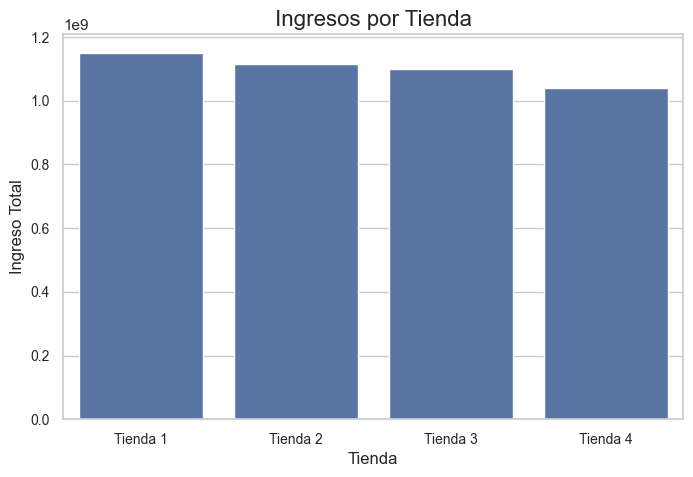

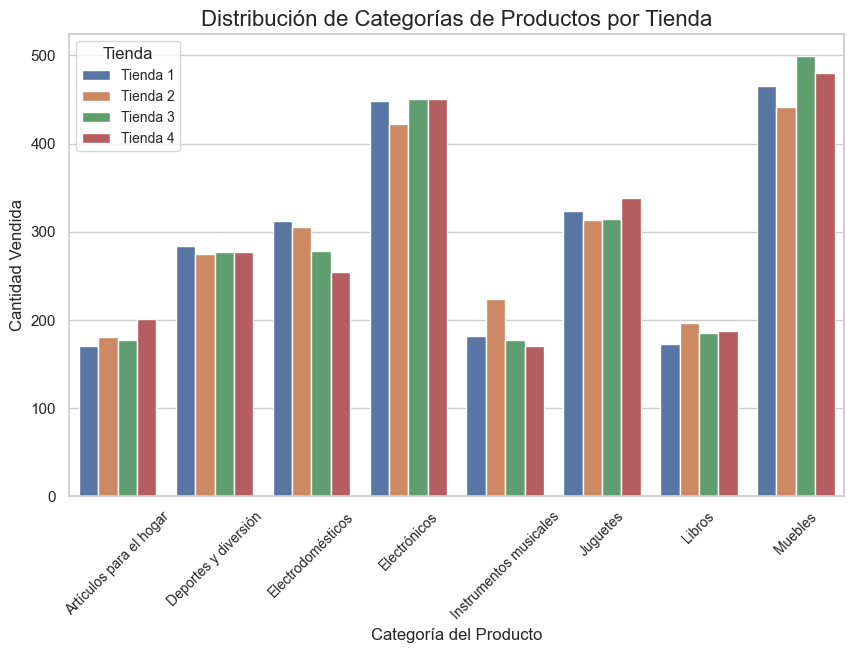

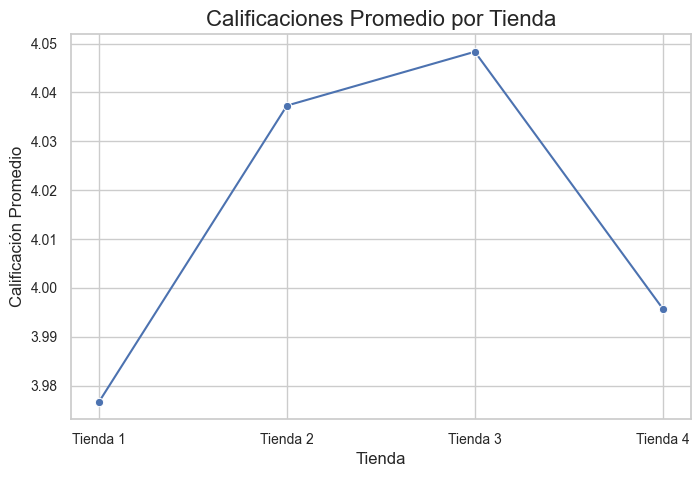

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de los gráficos
sns.set(style="whitegrid")

# Gráfico 1: Ingresos por tienda (barras)
plt.figure(figsize=(8, 5))
sns.barplot(x='Tienda', y='Ingreso Total', data=ingresos[:-1])  # Excluir el total
plt.title('Ingresos por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso Total', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Gráfico 2: Distribución de categorías de productos (barras apiladas)
categorias_tienda1 = tienda.groupby('Categoría del Producto').size().reset_index(name='Cantidad')
categorias_tienda2 = tienda2.groupby('Categoría del Producto').size().reset_index(name='Cantidad')
categorias_tienda3 = tienda3.groupby('Categoría del Producto').size().reset_index(name='Cantidad')
categorias_tienda4 = tienda4.groupby('Categoría del Producto').size().reset_index(name='Cantidad')

categorias = pd.concat([
    categorias_tienda1.assign(Tienda='Tienda 1'),
    categorias_tienda2.assign(Tienda='Tienda 2'),
    categorias_tienda3.assign(Tienda='Tienda 3'),
    categorias_tienda4.assign(Tienda='Tienda 4')
])

plt.figure(figsize=(10, 6))
sns.barplot(x='Categoría del Producto', y='Cantidad', hue='Tienda', data=categorias)
plt.title('Distribución de Categorías de Productos por Tienda', fontsize=16)
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Tienda', fontsize=10)
plt.show()

# Gráfico 3: Calificaciones promedio por tienda (líneas)
plt.figure(figsize=(8, 5))
sns.lineplot(x='Tienda', y='Calificación Promedio', data=calificaciones_promedio, marker='o')
plt.title('Calificaciones Promedio por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
# Informe Final: Análisis de Tiendas para la Venta del Sr. Juan

```markdown
El propósito de este análisis es identificar la tienda más adecuada para que el Sr. Juan venda sus productos, considerando factores clave como ingresos totales, categorías de productos más y menos vendidas, calificaciones promedio de los clientes, productos más y menos vendidos, y el coste de envío promedio.

## Análisis de Resultados

### 1. Ingresos Totales
Los ingresos totales de las tiendas son los siguientes:
- Tienda 1: $1,150,880,400.00
- Tienda 2: $1,116,343,500.00
- Tienda 3: $1,098,019,600.00
- Tienda 4: $1,038,375,700.00

La Tienda 1 tiene los ingresos más altos, lo que indica un buen desempeño en ventas.

### 2. Categorías de Productos Más Vendidas
Las categorías más populares por tienda son:
- **Tienda 1**: Muebles (465), Electrónicos (448)
- **Tienda 2**: Muebles (442), Electrónicos (422)
- **Tienda 3**: Muebles (499), Electrónicos (451)
- **Tienda 4**: Muebles (480), Electrónicos (451)

En todas las tiendas, las categorías de Muebles y Electrónicos son las más vendidas, destacando la Tienda 3 con la mayor cantidad de ventas en estas categorías.

### 3. Calificaciones Promedio
Las calificaciones promedio de los clientes son:
- Tienda 1: 3.98
- Tienda 2: 4.04
- Tienda 3: 4.05
- Tienda 4: 4.00

La Tienda 3 tiene la calificación promedio más alta, lo que refleja una mejor satisfacción del cliente.

### 4. Productos Más y Menos Vendidos
- **Tienda 1**: Más vendido: TV LED UHD 4K (60), Menos vendido: Celular ABXY (33)
- **Tienda 2**: Más vendido: Iniciando en programación (65), Menos vendido: Juego de mesa (32)
- **Tienda 3**: Más vendido: Kit de bancas (57), Menos vendido: Bloques de construcción (35)
- **Tienda 4**: Más vendido: Cama box (62), Menos vendido: Guitarra eléctrica (33)

La Tienda 4 tiene el producto más vendido con mayor cantidad (Cama box, 62).

### 5. Coste de Envío Promedio
El coste de envío promedio por tienda es:
- Tienda 1: $26,018.61
- Tienda 2: $25,216.24
- Tienda 3: $24,805.68
- Tienda 4: $23,459.46

La Tienda 4 tiene el coste de envío promedio más bajo, lo que puede ser un factor atractivo para los clientes.

## Conclusión y Recomendación
Basándonos en el análisis, se recomienda que el Sr. Juan venda sus productos en la **Tienda 3**. Esta tienda destaca por tener:
- La calificación promedio más alta (4.05), lo que indica una excelente satisfacción del cliente.
- La mayor cantidad de ventas en las categorías más populares (Muebles y Electrónicos).
- Un coste de envío competitivo en comparación con otras tiendas.

Aunque la Tienda 1 tiene los ingresos más altos, la Tienda 3 ofrece un equilibrio entre satisfacción del cliente, ventas en categorías clave y costes de envío razonables, lo que la convierte en la mejor opción para maximizar el éxito de las ventas del Sr. Juan.
```



Análisis del desempeño geográfico

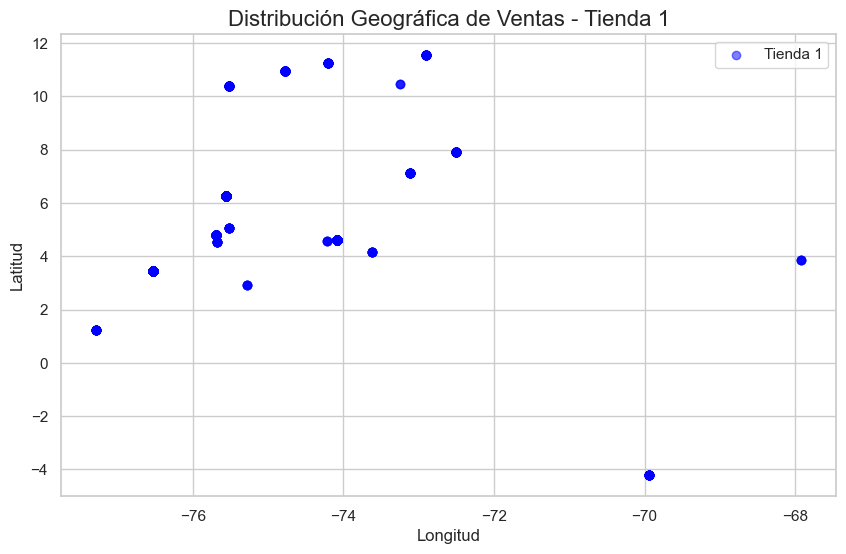

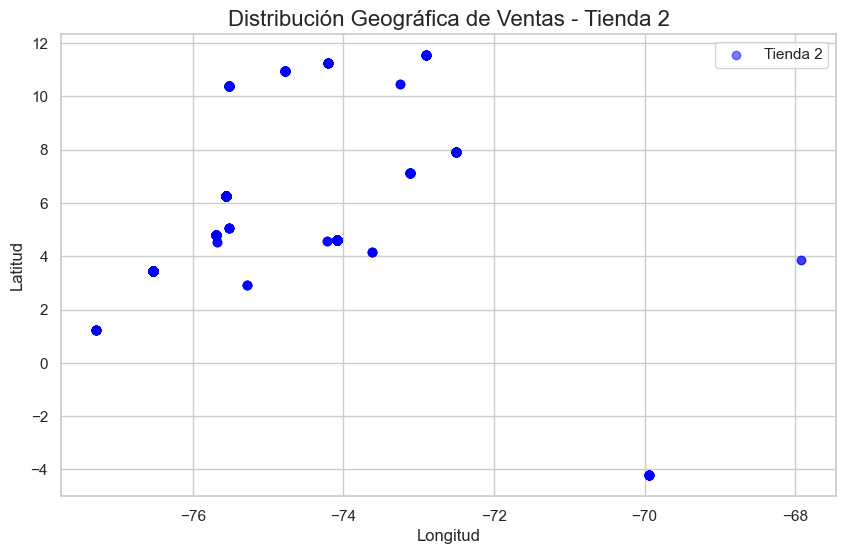

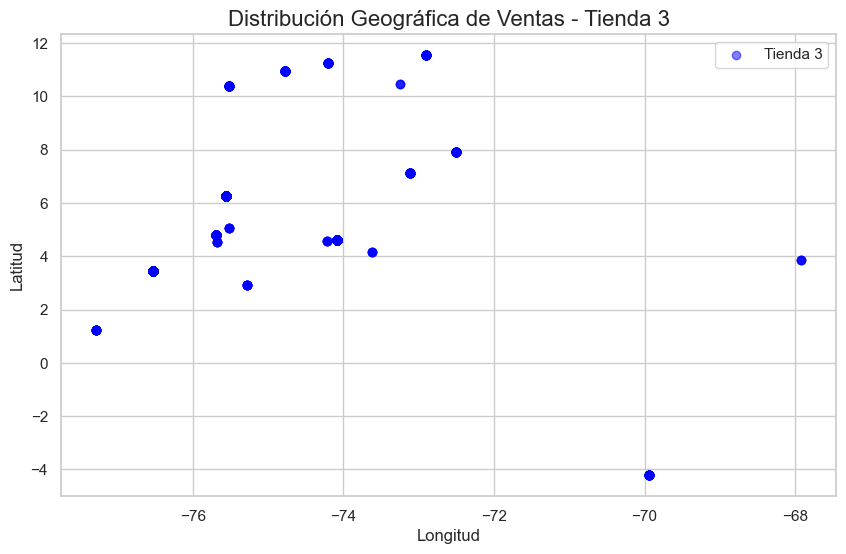

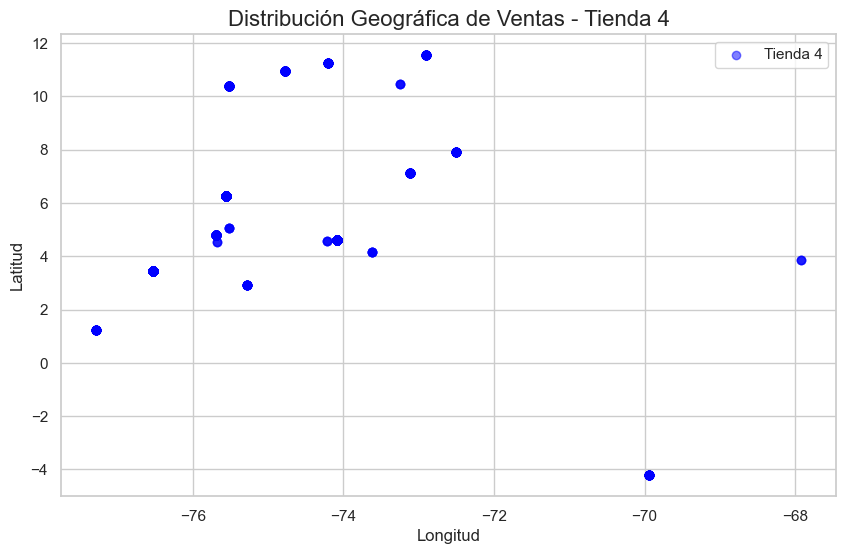

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Configurar pandas para mostrar números con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Gráfico de dispersión: Visualización de las ventas por ubicación
def graficar_dispersión(tienda, nombre_tienda):
    plt.figure(figsize=(10, 6))
    plt.scatter(tienda['lon'], tienda['lat'], alpha=0.5, c='blue', label=nombre_tienda)
    plt.title(f'Distribución Geográfica de Ventas - {nombre_tienda}', fontsize=16)
    plt.xlabel('Longitud', fontsize=12)
    plt.ylabel('Latitud', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Generar gráficos de dispersión para cada tienda
graficar_dispersión(tienda, 'Tienda 1')
graficar_dispersión(tienda2, 'Tienda 2')
graficar_dispersión(tienda3, 'Tienda 3')
graficar_dispersión(tienda4, 'Tienda 4')

# Mapa de calor: Visualización de la densidad de ventas
def generar_mapa_calor(tienda, nombre_tienda):
    mapa = folium.Map(location=[tienda['lat'].mean(), tienda['lon'].mean()], zoom_start=6)
    heat_data = [[row['lat'], row['lon']] for index, row in tienda.iterrows()]
    HeatMap(heat_data).add_to(mapa)
    return mapa

# Generar mapas de calor para cada tienda
mapa_tienda1 = generar_mapa_calor(tienda, 'Tienda 1')
mapa_tienda2 = generar_mapa_calor(tienda2, 'Tienda 2')
mapa_tienda3 = generar_mapa_calor(tienda3, 'Tienda 3')
mapa_tienda4 = generar_mapa_calor(tienda4, 'Tienda 4')

# Mostrar los mapas interactivos (en Jupyter Notebook o Colab)
mapa_tienda1.save("mapa_tienda1.html")
mapa_tienda2.save("mapa_tienda2.html")
mapa_tienda3.save("mapa_tienda3.html")
mapa_tienda4.save("mapa_tienda4.html")

ModuleNotFoundError: No module named 'folium'